### **CC57 - MACHINE LEARNING - MODELO REGRESION LOGISTICA**

En este ejemplo, la **función logit** se utiliza internamente en el modelo de regresión logística implementado en scikit-learn.

La **función logit** es una parte crucial de la regresión logística, ya que transforma las probabilidades en una escala que es linealmente relacionada con las variables independientes, lo que facilita la estimación de los coeficientes y la realización de predicciones.

In [15]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Visuaizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Crear un DataFrame con datos simulados
data = pd.DataFrame({
    'Feature_1': np.random.randn(100),    # Característica 1, valores aleatorios de una distribución normal estándar
    'Feature_2': np.random.randn(100),    # Característica 2, valores aleatorios de una distribución normal estándar
    'Target': np.random.randint(2, size=100)   # Variable de respuesta binaria (0 o 1)
})

# Guardar el DataFrame como un archivo CSV
data.to_csv('datos.csv', index=False)

#### **Paso 1:** Cargar y preparar los datos

In [5]:
# Paso 1: Cargar y preparar los datos
# Supongamos que tenemos un conjunto de datos en formato CSV donde la última columna es la variable de respuesta (0 o 1)
data = pd.read_csv("datos.csv")

data.head()

,Feature_1,Feature_2,Target
0,1.336950,0.231669,1
1,0.170195,-0.793777,1
2,-0.531839,-0.117884,1
3,0.641133,0.189741,0
4,0.278698,-0.224258,1


In [6]:
# Dividir el conjunto de datos en características (X) y variable de respuesta (y)
X = data.iloc[:, :-1]  # todas las columnas excepto la última
y = data.iloc[:, -1]   # la última columna

#### **Paso 2:** Dividir los datos en conjuntos de entrenamiento y prueba

In [7]:
# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Paso 3:** Crear un objeto de modelo de regresión logística

In [8]:
# Paso 3: Crear un objeto de modelo de regresión logística
model = LogisticRegression()

#### **Paso 4:** Entrenar el modelo con los datos de entrenamiento

Durante el entrenamiento del modelo (model.fit(X_train, y_train)), se ajustan los parámetros del modelo para minimizar la función de pérdida, que está relacionada con la **función logit**.

In [9]:
# Paso 4: Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


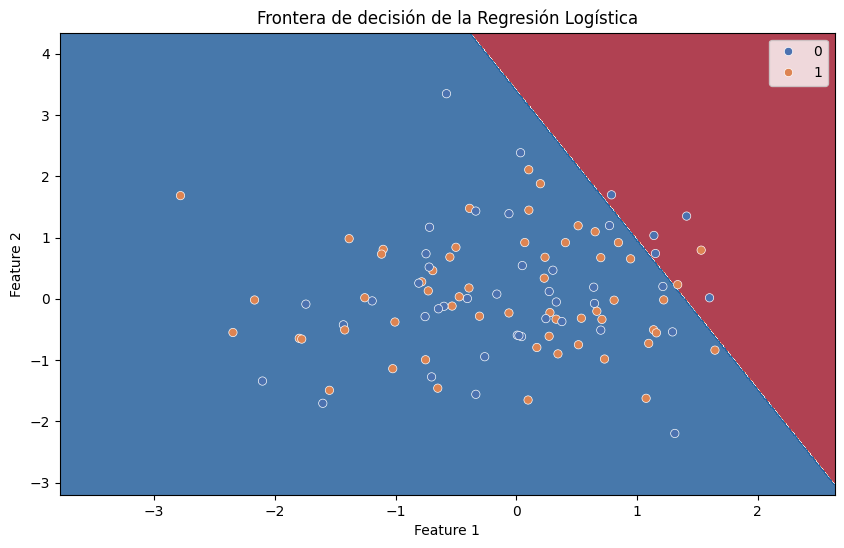

In [16]:
#Visualizacion

# Crear una malla de puntos para visualizar la frontera de decisión
x_min, x_max = X['Feature_1'].min() - 1, X['Feature_1'].max() + 1
y_min, y_max = X['Feature_2'].min() - 1, X['Feature_2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Target', data=data, palette='deep', edgecolor='w')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontera de decisión de la Regresión Logística')
plt.legend(loc='best')
plt.show()

#### **Paso 5**: Hacer predicciones utilizando el modelo entrenado

Cuando se hacen las predicciones (model.predict(X_test)), el modelo calcula la probabilidad de que cada observación pertenezca a la clase positiva utilizando la **función logit**. Luego, estas probabilidades se convierten en predicciones de clase binaria (0 o 1) utilizando un umbral predeterminado (0.5 por defecto en scikit-learn).

La **función sigmoide** es la **función de activación** utilizada internamente en la regresión logística para transformar la salida del modelo lineal en probabilidades en el rango de 0 a 1.

La función sigmoide se define como:

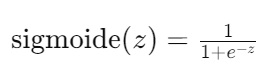

donde **z** es la combinación lineal de las características y los coeficientes del modelo. En el código, cuando se llama al método predict() del modelo de regresión logística, el modelo calcula **z** para cada observación y luego aplica la función sigmoide para obtener la probabilidad de que esa observación pertenezca a la clase positiva.

In [10]:
# Paso 5: Hacer predicciones utilizando el modelo entrenado
y_pred = model.predict(X_test)

#### **Paso 6:** Evaluar el rendimiento del modelo

Al evaluar el rendimiento del modelo, se utilizan métricas como la precisión, que comparan las predicciones del modelo con las etiquetas reales.

La precisión del modelo se calcula utilizando la **función logit** para transformar las probabilidades en predicciones de clase.


In [11]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.45


In [12]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[ 1 10]
 [ 1  8]]


In [13]:
# Mostrar un informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(class_report)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.44      0.89      0.59         9

    accuracy                           0.45        20
   macro avg       0.47      0.49      0.37        20
weighted avg       0.47      0.45      0.35        20

